In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import openpyxl

# Load the dataset into a Pandas DataFrame
data = pd.read_excel(r"C:\Users\GARVITA\OneDrive\Desktop\datasheetformetastatic_RGCIRC.xlsx", engine="openpyxl")
data

,Year of diagnosis,Age at diagnosis,Height,Weight,BMI,Family history,Histology,Charlson Comorbidity Index,T,N,...,Bones,Nodes,Viscera,PSA levels,Gleason Score,ECOG,Nadir PSA,PSA doubling time< 6 months,BP,Survival after 3 years
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015.0,80.0,NaN,NaN,NaN,No,Adenocarcinoma,6.0,4.0,NaN,...,Yes,Yes,NaN,131.000,8.0,2.0,0.010,Yes,Yes,Yes
3,2013.0,66.0,156.0,89.0,NaN,Yes,Adenocarcinoma,5.0,4.0,N0,...,NaN,Yes,NaN,105.000,6.0,2.0,NaN,NaN,No,Yes
4,2013.0,77.0,NaN,NaN,NaN,No,Adenocarcinoma,5.0,4.0,N0,...,Yes,NaN,NaN,32.000,7.0,1.0,0.190,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,2015.0,69.0,166.0,62.1,NaN,No,Adenocarcinoma,5.0,4.0,N1,...,NaN,Yes,NaN,634.466,NaN,2.0,2.730,NaN,Yes,Yes
408,2015.0,61.0,178.0,65.2,NaN,No,Adenocarcinoma,5.0,3.0,N0,...,Yes,NaN,NaN,37.400,8.0,1.0,0.134,No,Yes,Yes
409,2015.0,65.0,155.0,78.0,NaN,No,Adenocarcinoma,5.0,4.0,N1,...,NaN,Yes,NaN,185.000,9.0,1.0,0.012,No,Yes,Yes
410,2015.0,76.0,NaN,NaN,NaN,No,Adenocarcinoma,5.0,3.0,N1,...,Yes,Yes,NaN,58.800,7.0,2.0,0.176,Yes,Yes,No


In [2]:
data= data.drop('Height', axis=1)
data= data.drop('Weight', axis=1)
data= data.drop('BMI', axis=1)
data.dropna(how='all', inplace=True)
# Replace missing values with the median of the column
data['Family history'] = data['Family history'].fillna("No")
data['BP'] = data['BP'].fillna("No")
data['Survival after 3 years'] = data['Survival after 3 years'].fillna("No")
data['Bones'] = data['Bones'].fillna("No")
data['Nodes'] = data['Nodes'].fillna("No")
data['Viscera'] = data['Viscera'].fillna("No")
data['Gleason Score']=data['Gleason Score'].fillna(0)
data['Nadir PSA']=data['Nadir PSA'].fillna(0)
data['PSA levels']=data['PSA levels'].fillna(0)
data['ECOG']=data['ECOG'].fillna(data['ECOG'].mean())

data['PSA doubling time< 6 months']= data['PSA doubling time< 6 months'].fillna("No")
dummies = pd.get_dummies(data[['Family history', 'Histology', 'Bones', 'Nodes', 'Viscera','M', 'N','PSA doubling time< 6 months', 'BP', 'Survival after 3 years']])
data = pd.concat([data, dummies], axis=1)
data= data.drop(['Family history', 'Histology', 'N', 'M', 'Bones', 'Nodes',
       'Viscera','PSA doubling time< 6 months', 'BP', 'Survival after 3 years',
       'Family history_No', 'Family history_Yes',
       'Histology_Acinar AdencoarciNoma',
       'Histology_Acinar Adenocarcinoma ',
       'Histology_Adenocarcinoma ',
       'Histology_acinar Adenocarcinoma', 'M_M1', 'Bones_No', 'Nodes_No', 'Viscera_No',
       'PSA doubling time< 6 months_No','BP_No',
       'Survival after 3 years_No', 'Survival after 3 years_No  '], axis=1)

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [4]:
print(data.isna().sum())


Year of diagnosis                            0
Age at diagnosis                             0
Charlson Comorbidity Index                   0
T                                            0
PSA levels                                   0
Gleason Score                                0
ECOG                                         0
Nadir PSA                                    0
Histology_Acinar Adenocarcinoma              0
Histology_Adenocarcinoma                     0
Histology_Neuroendocrine Carcinoma           0
Histology_Rhabdomyosarcoma                   0
Histology_Signet Ring Cell Adenocarcinoma    0
Bones_Yes                                    0
Nodes_Yes                                    0
Viscera_Yes                                  0
M_M1b                                        0
N_N0                                         0
N_N1                                         0
N_N2                                         0
PSA doubling time< 6 months_Yes              0
BP_Yes       

In [5]:
# Split data into features and target
X = data.drop("Survival after 3 years_Yes", axis=1)
y = data["Survival after 3 years_Yes"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# OVERSAMPLING using smote
from imblearn.over_sampling import SMOTE
smt=SMOTE()
X_train, y_train=smt.fit_resample(X_train, y_train)

Decision Tree Classifier Accuracy: 0.6707317073170732
Precision: 0.6551724137931034
Recall: 0.5277777777777778
F1 Score: 0.5846153846153845
ROC-AUC Score: 0.6551932367149759


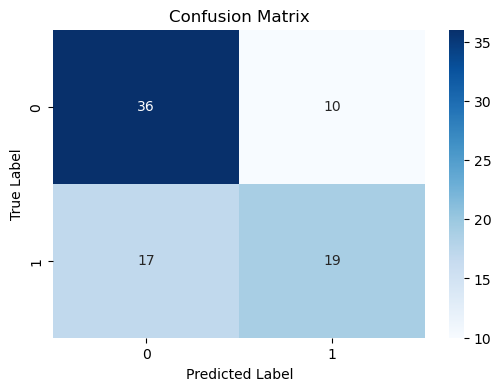

In [7]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test, y_pred_dtc)
print("Decision Tree Classifier Accuracy:", dtc_acc)
print("Precision:", precision_score(y_test, y_pred_dtc))
print("Recall:", recall_score(y_test, y_pred_dtc))
print("F1 Score:", f1_score(y_test, y_pred_dtc))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_dtc))
cm = confusion_matrix(y_test, y_pred_dtc)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Random Forest Classifier Accuracy: 0.7560975609756098
Precision: 0.7666666666666667
Recall: 0.6388888888888888
F1 Score: 0.696969696969697
ROC-AUC Score: 0.7433574879227053


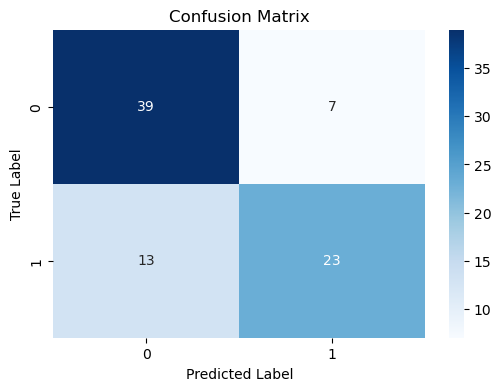

In [8]:
# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, y_pred_rfc)
print("Random Forest Classifier Accuracy:", rfc_acc)
cm = confusion_matrix(y_test, y_pred_rfc)
print("Precision:", precision_score(y_test, y_pred_rfc))
print("Recall:", recall_score(y_test, y_pred_rfc))
print("F1 Score:", f1_score(y_test, y_pred_rfc))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_rfc))
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

KNN Classifier Accuracy: 0.6829268292682927


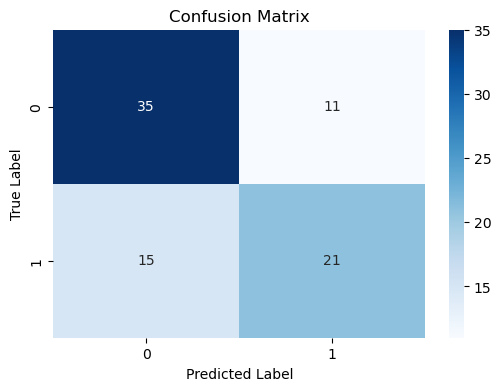

In [9]:
# KNN Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)
print("KNN Classifier Accuracy:", knn_acc)
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

SVM Classifier Accuracy: 0.7560975609756098
Precision: 0.75
Recall: 0.6666666666666666
F1 Score: 0.7058823529411765
ROC-AUC Score: 0.7463768115942029


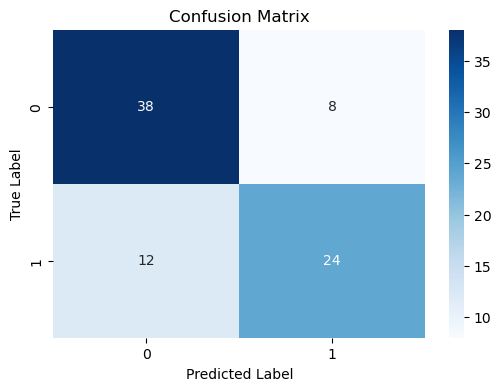

In [10]:
# SVM Classifier
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
print("SVM Classifier Accuracy:", svm_acc)
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_svm))
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Logistic Regression Accuracy: 0.7682926829268293
Precision: 0.7428571428571429
Recall: 0.7222222222222222
F1 Score: 0.732394366197183
ROC-AUC Score: 0.7632850241545894


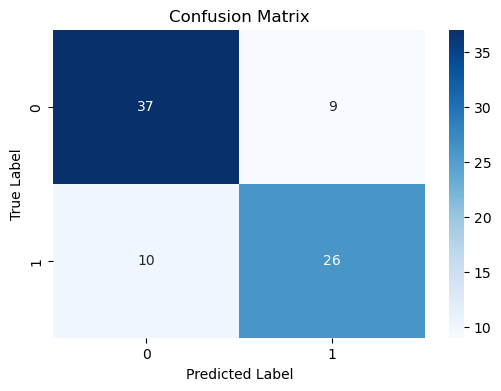

In [11]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", lr_acc)
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_lr))
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Precision: 0.8387096774193549
Recall: 0.7222222222222222
F1 Score: 0.7761194029850746
ROC-AUC Score: 0.8067632850241545
Accuracy: 0.8170731707317073


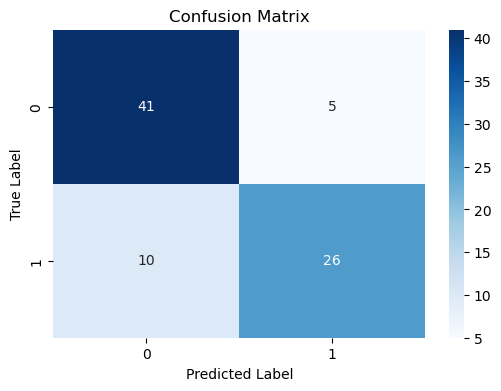

In [12]:
#Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
confusion_mtx = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy: 0.7560975609756098
Precision: 0.7666666666666667
Recall: 0.6388888888888888
F1 Score: 0.696969696969697
ROC-AUC Score: 0.7433574879227053


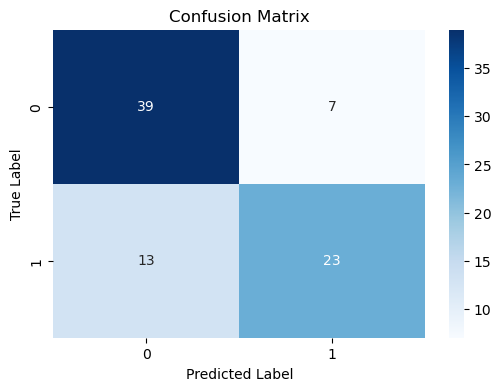

In [13]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()